<center>

# ZUBER # 


A Zuber é uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. 

O objetivo deste projeto é encontrar padrões nas informações disponíveis, entender as preferências dos passageiros, como por exemplo, os bairros mais utilizados como destinos dos usuários de táxi em Chicago e as maiores empresas de táxi na cidade, assim como o impacto de fatores externos nas corridas.

Trabalhando com um banco de dados, analisaremos alguns concorrentes e também testaremos uma hipótese sobre o impacto do clima nas viagens.

## Análise Exploratória de Dados ##

Vamos começar importando as bibliotecas que serão necessárias para as análises dos dados:

In [185]:
# importando as bibliotecas necessárias para o desenvolvimento do trabalho
import pandas as pd
import numpy as np
import seaborn as sns
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st

Agora, começaremos a analisar os dados de um arquivo com o número de corridas para cada companhia de taxi nos dias 15 e 16 de novembro de 2017.

### Viagens por companhia de táxi em Chicago ###

In [186]:
# lendo o arquivo com o número de corridas para cada companhia de taxi de 15 a 16 de novembro de 2017
df_company_trips = pd.read_csv('./datasets/trips_amount.csv')

In [187]:
# Imprimindo as primeiras linhas do DF para exibir uma amostra inicial dos dados
print(df_company_trips.head(5))

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [188]:
# Imprimindo informações sobre o DataFrame para avaliação
print(df_company_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [189]:
# Analisando se o DataFrame apresenta linhas duplicadas
print(df_company_trips.duplicated().sum())

0


**Resumo das informações do DataFrame:**

* O arquivo contém 2 colunas e 64 linhas;
* O DataFrame não apresenta dados ausentes e nem linhas duplicadas;
* A coluna "company_name" apresenta alguns nomes de companhias iniciando com um número padrão xxxx - xxxxx;
* Os nomes das colunas estão corretos em snake_case;
* Convém alterar os tipos de dados da coluna "company_name" para category.

In [190]:
# Alterando os tipos de dados da coluna "company_name" para category
df_company_trips['company_name'] = df_company_trips['company_name'].astype('category')

print(df_company_trips.dtypes)

company_name    category
trips_amount       int64
dtype: object


In [191]:
# Ordenando os dados em ordem decrescente e criando a variável top_20 de companhias de táxi de Chicago
df_company_top_20 = df_company_trips.sort_values(by = 'trips_amount', ascending = False).set_index('company_name')[0:20]

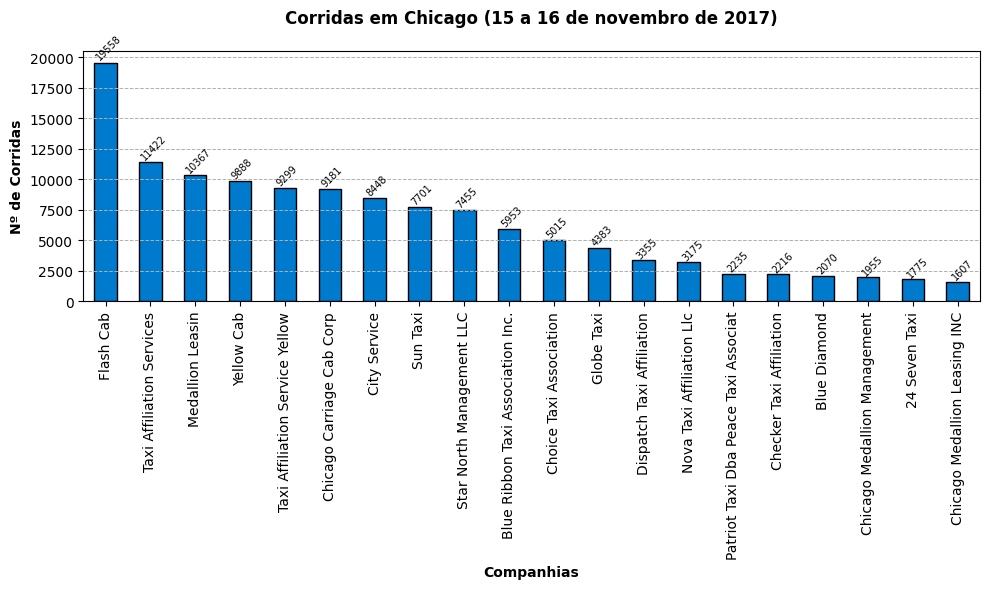

In [192]:
# plotando um gráfico de barras com as corridas realizadas na cidade de chicago nos dias 15 e 16 de novembro por companhia
ax = df_company_top_20.plot(kind='bar',
                            figsize=[10, 6],
                            rot=90,
                            legend=False,
                            color='#007acc',
                            edgecolor='black')

# Adicionando gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7)
ax.set_title('Corridas em Chicago (15 a 16 de novembro de 2017)', fontsize=12, weight='bold', pad=20)
ax.set_xlabel('Companhias', fontsize=10, weight='bold')
ax.set_ylabel('Nº de Corridas', fontsize=10, weight='bold')

# Adicionando valores acima das barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() * 1.005, p.get_height() * 1.005),
                rotation=45,
                ha='left', va='bottom', fontsize=7)

# Ajustando o layout para melhor exibição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

**Analisando o gráfico de barras, podemos observar que:**

* As companhias que começam com os dígitos no padrão xxxx - xxxxx, conforme observado acima, provavelmente são companhias pequenas ou mesmo independentes (com apenas 1 motorista independente), pois podemos observar que nenhuma delas aparece dentre as 20 maiores empresas de táxi de chicago;


* A companhia "Flash Cab" é a maior de Chicago, tendo realizado quase o dobro de corridas em relação a segunda colocada "Taxi Affiliations Services" nas datas avaliadas.

**Agora vamos analisar os bairros mais utilizados como destino das corridas de táxi da cidade de Chicago**

### Média de viagens finalizadas em cada bairro de Chicago ###

In [193]:
#lendo o arquivo e imprimindo 5 linhas do DataFrame para visualização do padrão
df_dropoff_avg = pd.read_csv('./datasets/dropoff_location_name.csv')

print(df_dropoff_avg.sample(5))

   dropoff_location_name  average_trips
77        Archer Heights       8.366667
18             West Town     516.400000
79           Fuller Park       8.166667
29           Albany Park     180.900000
1            River North    9523.666667


In [194]:
# Imprimindo as informações do DataFrame para avaliação
print(df_dropoff_avg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [195]:
# Analisando se o DataFrame apresenta linhas duplicadas
print(df_dropoff_avg.duplicated().sum())

0


**Resumo das informações do DataFrame:**

* O arquivo contém 2 colunas e 94 linhas;
* O DataFrame não apresenta dados ausentes e nem linhas duplicadas;
* Os nomes das colunas estão corretos em snake_case;
* Convém alterar os tipos de dados da coluna "dropoff_location_name" para "category".

In [196]:
# Alterando os tipos de dados da coluna "dropoff_location_name" para "category".
df_dropoff_avg['dropoff_location_name'] = df_dropoff_avg['dropoff_location_name'].astype('category')

print(df_dropoff_avg.dtypes)

dropoff_location_name    category
average_trips             float64
dtype: object


**Vamos identificar os 10 principais bairros utilizados como destinos das viagens de táxi na cidade de Chicago**

In [197]:
# Criando um DataFrame com as 10 maiores médias em ordem decrescente
top_10_neighborhood = df_dropoff_avg.sort_values(by = 'average_trips', ascending = False)[0:10]

# Definindo a coluna 'dropoff_location_name' como índice para posterior plotagem do gráfico
top_10_neighborhood = top_10_neighborhood.set_index('dropoff_location_name')
print(top_10_neighborhood)

                       average_trips
dropoff_location_name               
Loop                    10727.466667
River North              9523.666667
Streeterville            6664.666667
West Loop                5163.666667
O'Hare                   2546.900000
Lake View                2420.966667
Grant Park               2068.533333
Museum Campus            1510.000000
Gold Coast               1364.233333
Sheffield & DePaul       1259.766667


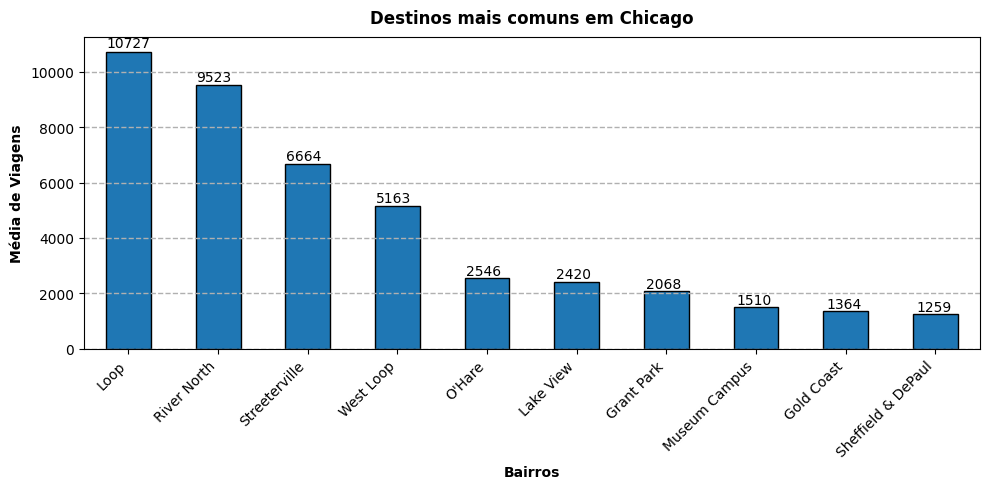

In [198]:
# plotando um gráfico de barras para exibir os destinos mais comuns
ax = top_10_neighborhood.plot(kind = 'bar',
                         figsize = [10, 5],
                         legend = False,
                         edgecolor='black')

ax.set_title('Destinos mais comuns em Chicago', fontsize=12, weight='bold', pad=10)
ax.set_xlabel('Bairros', fontsize=10, weight='bold')
ax.set_ylabel('Média de Viagens', fontsize=10, weight='bold')

# Adicionando gridlines
ax.grid(True, linestyle='--', linewidth=1, axis='y')

# Rotacionando os rótulos do eixo x
ax.set_xticklabels(top_10_neighborhood.index, rotation=45, ha='right')

# Adicionando valores acima das barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() * 1.005, p.get_height() * 1.005),
                rotation=0,
                ha='left', va='bottom', fontsize=10)

# Ajustando o layout para melhor exibição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

**Analisando o gráfico podemos observar que os bairros que mais são destino de corridas de taxi são 'Loop', 'River North' e 'Streeterville':**

* O bairro que recebe mais corridas de táxi é o Loop. Este é um bairro muito visitado por turistas, pois lá estão localizadas atrações incríveis, restaurantes, bares, shoppings, parques, museus, teatros e muitos outros lugares que são considerados destinos imperdíveis na cidade de Chicago;


* O Segundo colocado é o River North, que para muitos é a região mais interessante para quem curte bater perna a esmo. Ele fica entre a Chicago Avenue e o Chicago River e tem muitas coisas valorizadas pelos turistas, inclusive os quarteirões da Ohio Street e Ontario Street, que possuem ótimos restaurantes;


* O terceiro bairro que mais recebe viagens de táxi é o Streeterville. Ele fica na parte à direita da Mag Mile, onde ficam vários hotéis com boa localização e tarifas mais competitivas, como o Aloft e o DoubleTree. Ele é um bairro que tem menos atrações como lojas e restaurantes, mas geralmente é muito utilizado por turistas para dormir, devido às tarifas de hotéis.


**Isso nos indica que o turismo impacta bastante nas atividades dos táxis de Chicago.**

## Testes de Hipóteses ##

Vamos utilizar o DataFrame "df_weather_trips", que contém dados sobre viagens do bairro 'Loop' para o Aeroporto Internacional O'Hare.

### Análise Exploratória de Dados ###

In [199]:
# Lendo o DataFrame e imprimindo uma amostra de 5 linhas para análise inicial
df_weather_trips = pd.read_csv('./datasets/loop_to_ohare.csv')

print(df_weather_trips.head(5))

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [200]:
# imprimindo informações sobre o DataFrame para análises iniciais
print(df_weather_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


**Resumo das informações do DataFrame 'df_weather_trips':**

* O arquivo contém 3 colunas e 1068 linhas;


* O DataFrame não apresenta dados ausentes e nem linhas duplicadas;


* Os nomes das colunas estão corretos em snake_case;


* Convém converter os tipos de dados da coluna 'start_ts' para "datetime" e os dados da coluna 'weather_conditions' para "category".

In [201]:
# Convertendo os tipos de dados da coluna "start_ts" para datetime
df_weather_trips['start_ts'] = pd.to_datetime(df_weather_trips['start_ts'], format = '%Y-%m-%d %H:%M:%S')

#Checando o se o padrão de data está correto assim como se a conversão de dados ocorreu corretamente
print(df_weather_trips.sample(2))
print()
print(df_weather_trips.dtypes)

               start_ts weather_conditions  duration_seconds
824 2017-11-11 16:00:00               Good            2580.0
317 2017-11-25 18:00:00               Good            2280.0

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


In [202]:
# Convertendo os tipos de dados da coluna 'weather_conditions' para "category"
df_weather_trips['weather_conditions'] = df_weather_trips['weather_conditions'].astype('category')

print(df_weather_trips.dtypes)

start_ts              datetime64[ns]
weather_conditions          category
duration_seconds             float64
dtype: object


### Plotando distribuições: ###

**Vamos começar verificando se os dados do DataFrame são realmente todos relacionados ao dia de sábado e também o intervalo de datas que nossos dados cobrem.**

In [203]:
# criando uma coluna com dia da semana (O sábado é representado pelo número 5)
df_weather_trips['weekday'] = df_weather_trips['start_ts'].dt.weekday

inicio = df_weather_trips['start_ts'].min()
final = df_weather_trips['start_ts'].max()

# Imprimindo os dias da semana contidos no DF
print(df_weather_trips['weekday'].unique())
print()
print(f'Os dados iniciam em: {inicio}')
print()
print(f'Os dados terminam em: {final}')

[5]

Os dados iniciam em: 2017-11-04 00:00:00

Os dados terminam em: 2017-11-25 23:00:00


Agora sabemos que temos dados somente relacionados aos sábados, do dia 04 de novembro ao dia 25 de novembro. Portanto, temos dados referentes a 4 sábados (04, 11, 18 e 25)

**Vamos plotar a distribuição de corridas ao longo do dia:**

In [204]:
# criando uma coluna somente com as horas das corridas para agrupar os dados por horas ao longo do dia
df_weather_trips['start_ts_hour'] = df_weather_trips['start_ts'].dt.hour

# vamos remover a coluna 'weekday' ciada anteriormente, pois agora ela não mos é mais útil
df_weather_trips_new = df_weather_trips.drop('weekday', axis=1)

print(df_weather_trips_new.head(5))

             start_ts weather_conditions  duration_seconds  start_ts_hour
0 2017-11-25 16:00:00               Good            2410.0             16
1 2017-11-25 14:00:00               Good            1920.0             14
2 2017-11-25 12:00:00               Good            1543.0             12
3 2017-11-04 10:00:00               Good            2512.0             10
4 2017-11-11 07:00:00               Good            1440.0              7


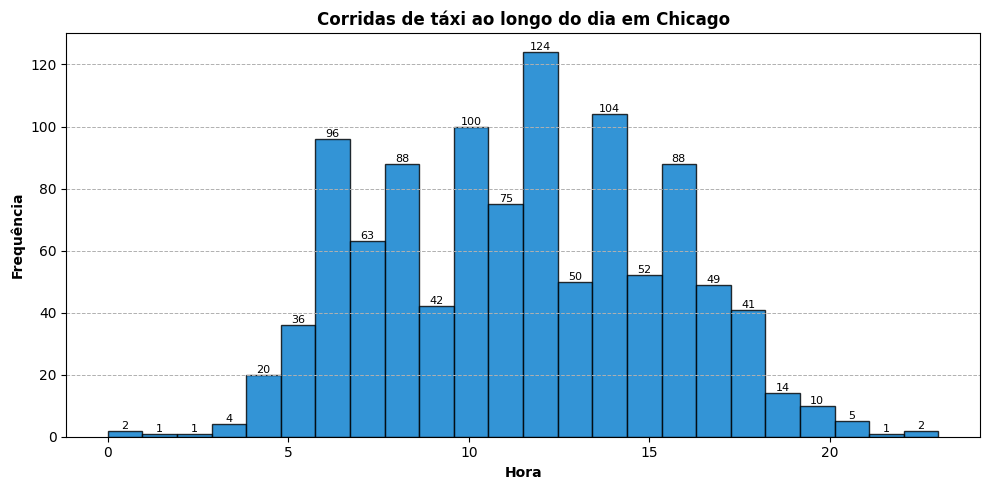

In [205]:
# Plotando a distribuição de corridas ao longo do dia
ax = df_weather_trips_new['start_ts_hour'].plot(kind='hist',
                                                bins=24,
                                                figsize=[10, 5],
                                                color='#007acc',
                                                edgecolor='black',
                                                alpha=0.8)

# Adicionando rótulos e título
ax.set_title('Corridas de táxi ao longo do dia em Chicago', weight='bold', fontsize=12)
ax.set_xlabel('Hora', weight='bold', fontsize=10)
ax.set_ylabel('Frequência', weight='bold', fontsize=10)

# Adicionando uma grade
ax.grid(axis='y', linestyle='--', linewidth=0.7)

# Adicionando valores acima das barras
bin_edges = ax.patches[0].get_bbox().bounds
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

# Ajustando o layout para melhor exibição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

A maior frequência ocorre às 12:00, mas podemos ver picos também às 06:00, 08:00, 10:00, 14:00 e 16:00;

Das 19:00 às 03:00 os serviços de táxi são pouco utilizados em Chicago.

**Agora vamos plotar no mesmo gráfico as distribuições, separando os dados referentes aos dias com tempo bom e ruim para comparar.**

In [206]:
# Filtrando o DataFrame somente com dados referentes aos horários com tempo ruim
df_weather_trips_bad = df_weather_trips_new[df_weather_trips_new['weather_conditions'] == 'Bad']

# Filtrando o DataFrame somente com dados referentes aos horários com tempo bom
df_weather_trips_good = df_weather_trips_new[df_weather_trips_new['weather_conditions'] == 'Good']

print(df_weather_trips_bad.head(3))
print()
print(df_weather_trips_good.head(3))

              start_ts weather_conditions  duration_seconds  start_ts_hour
6  2017-11-04 16:00:00                Bad            2969.0             16
30 2017-11-18 12:00:00                Bad            1980.0             12
34 2017-11-04 17:00:00                Bad            2460.0             17

             start_ts weather_conditions  duration_seconds  start_ts_hour
0 2017-11-25 16:00:00               Good            2410.0             16
1 2017-11-25 14:00:00               Good            1920.0             14
2 2017-11-25 12:00:00               Good            1543.0             12


In [207]:
# Verificando os dias e horários em que tivemos tempo chuvoso
print(df_weather_trips_bad['start_ts'].value_counts())

start_ts
2017-11-04 16:00:00    39
2017-11-18 12:00:00    26
2017-11-04 17:00:00    24
2017-11-04 18:00:00    17
2017-11-18 08:00:00    17
2017-11-18 10:00:00    14
2017-11-18 13:00:00    14
2017-11-18 07:00:00    12
2017-11-18 16:00:00    10
2017-11-18 17:00:00     3
2017-11-18 09:00:00     2
2017-11-18 00:00:00     1
2017-11-18 21:00:00     1
Name: count, dtype: int64


**Dos 4 dias analisados, tivemos chuvas somente nos dias 04 e 18, sendo que os únicos horários em que a chuva coincidiu nestes 2 dias foi às 16:00 e 17:00.**

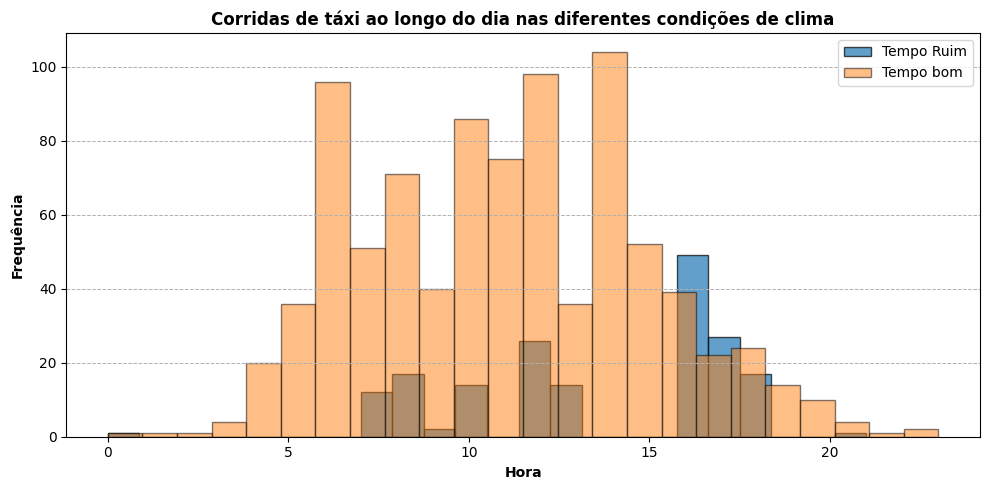

In [208]:
plt.figure(figsize=[10, 5])

# Plotando o histograma de frequencia de corridas com tempo ruim
ax = df_weather_trips_bad['start_ts_hour'].plot(kind='hist',
                                                bins=24,
                                                alpha=0.7,
                                                color='#1f77b4',
                                                edgecolor='black',
                                                label='Tempo Ruim')

# Plotando o histograma de frequencia de corridas com tempo bom
df_weather_trips_good['start_ts_hour'].plot(kind='hist',
                                            bins=24,
                                            alpha=0.5,
                                            color='#ff7f0e',
                                            edgecolor='black',
                                            label='Tempo bom',
                                            ax=ax)

# incluindo legendas e títulos
plt.legend(fontsize=10, loc='upper right')
plt.title('Corridas de táxi ao longo do dia nas diferentes condições de clima', fontsize=12, weight='bold')
plt.xlabel('Hora', fontsize=10, weight='bold')
plt.ylabel('Frequência', fontsize=10, weight='bold')

# Adicionando grade
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Temos poucas amostras de corridas realizadas em clima chuvoso, pois analisamos dados de apenas 4 dias e não choveu muito nestes dias. Caso tivéssemos uma amostra maior em relação a este grupo, poderíamos comparar se há uma tendência maior de usuários solicitarem os serviços de taxis nos dias de chuva, o que aparenta ser verdade analisando os horários das 16:00 e 17:00.

**Agora vamos criar as listas com dados para finalmente realizarmos o teste de hipóteses:**

In [209]:
# calculando a média da duração das corridas para os momentos de tempo bom e tempo ruim
df_weather_trips_mean = df_weather_trips.groupby('weather_conditions', observed = False)['duration_seconds'].mean()

# Filtrando e criando uma lista com os valores de duração das corridas somente com tempo ruim (chuva)
bad_weather = df_weather_trips[df_weather_trips['weather_conditions'] == 'Bad']
bad_weather_duration_list = bad_weather['duration_seconds'].tolist()

# Filtrando e criando uma lista com os valores de duração das corridas somente com tempo bom
good_weather = df_weather_trips[df_weather_trips['weather_conditions'] == 'Good']
good_weather_duration_list = good_weather['duration_seconds'].tolist()

print(df_weather_trips_mean) #Imprimindo a média de duração das corridas para cada categoria
print()
print(bad_weather['weather_conditions'].value_counts()) # contando a quantidade de amostras obtidas com tempo ruim
print()
print(good_weather['weather_conditions'].value_counts()) # contando a quantidade de amostras obtidas com tempo bom

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

weather_conditions
Bad     180
Good      0
Name: count, dtype: int64

weather_conditions
Good    888
Bad       0
Name: count, dtype: int64


**EXPLICAÇÃO:**

Como iremos comparar se as médias de duas populações são iguais entre si (duração das corridas em dias de tempo bom x duração das corridas em dias de tempo ruim), utilizaremos o **teste-t** e faremos a formulação de uma **hipótese bicaudal**. 
O objetivo de um teste de uma hipótese bicaudal é mostrar se a média amostral é significativamente maior ou menor do que a média de uma população.

Para realizar o teste-t, primeiro **Iremos definir o valor do Limiar Alpha em 5%**, ou seja, **0.05**. Isso significa que iremos verificar se um valor cai na área de 2,5% à esquerda da média ou 2,5% à direita da média e, se isso acontecer, podemos concluir que o nosso resultado experimental cumpre o requisito de significância estatística. Portanto, **rejeitamos a hipótese nula**.


Na estatística, **A hipótese nula (H0)**, costuma representar a ideia de que **não há diferença entre as médias** (ou seja, elas são iguais). Já **A hipótese alternativa (H1)**, representa a ideia de que **há diferença entre as médias** (ou seja, elas são diferentes entre si).

É sensato usar o **valor-p** para decidir aceitar ou rejeitar a hipótese nula. **O valor-p** é a probabilidade de obter um resultado pelo menos tão extremo quanto o que estamos considerando, supondo que a hipótese nula esteja correta. Se o **valor-p** for menor que **alpha**, rejeitamos a hipótese nula. Caso contrário, não podemos rejeitá-la.


Porém, para realizarmos o teste-t em Python, precisamos definir antes o **parâmetro "equal_var**, para o qual devemos seguir da seguinte forma:

* Se as variâncias forem iguais, usaremos equal_var=True;
* Se as variâncias forem diferentes, usaremos equal_var=False

**Portanto, antes de seguirmos para o test-t, devemos primeiro verificar a igualdade das variâncias através do teste de Levene. Caso o p-valor para o teste de Levene seja menor do que o alpha, rejeitamos a hipótese nula.**

In [210]:
#TESTE DE LEVENE
# Caso o p-valor para o teste de Levene seja menor do que o alpha, rejeitamos a hipótese nula

# Hipótese Nula (h0) = Não há uma diferença significativa entre as variâncias.
# Hipótese Alternativa (h1) = Há uma diferença significativa entre as variâncias.

alpha_levene = 0.05

levene_test = st.levene(bad_weather_duration_list, good_weather_duration_list)

print(levene_test)
print()

if  levene_test.pvalue < alpha_levene:
    print('Como p-valor é menor que alpha, rejeitamos a hipótese nula. Usar equal_var=False')
else:
     print('Como p-valor é maior que alpha, Não podemos rejeitar a hipótese nula. Usar equal_var=True')

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Como p-valor é maior que alpha, Não podemos rejeitar a hipótese nula. Usar equal_var=True


**Agora já sabemos que devemos utilizar o parâmetro equal_var = True. Portanto seguiremos para a realização do teste-t:**

In [211]:
#TESTE T

# Hipótese nula(h0): A duração média das corridas do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos.
# Hipótese Alternativa(h1):A duração média das corridas do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

#definindo nível de significância
alpha = 0.05

# Realizando o ttest para cálculo do p-valor e chamando os dados obtidos anteriormente
results = st.ttest_ind(bad_weather_duration_list, good_weather_duration_list, equal_var = True)

print('valor-p', results.pvalue)
print()

if results.pvalue < alpha:
    print('Como p-valor é menor que alpha, rejeitamos a hipótese nula.')
else:
     print('Como p-valor é maior que alpha, Não podemos rejeitar a hipótese nula')

valor-p 6.517970327099473e-12

Como p-valor é menor que alpha, rejeitamos a hipótese nula.


**Conclusão: Como o valor-p obtido é menor que o valor de alpha, rejeitamos a hipótese nula. Isso significa que estatísticamente a duração média das corridas do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos, ou seja, o tempo gasto nos sábados chuvosos é estatísticamente maior do que o tempo gasto nas viagens dos sábados não chuvosos.**

<center> 

# Renan Rosental de Oliveira # 
